C:\Users\Abc\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


529901
accuray of the model is  96.6298076923077


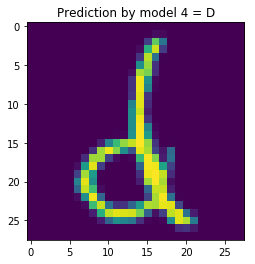

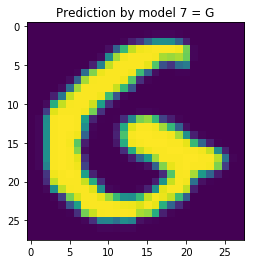

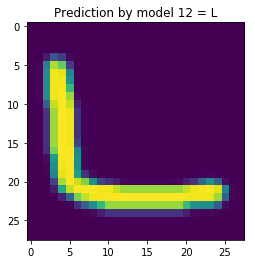

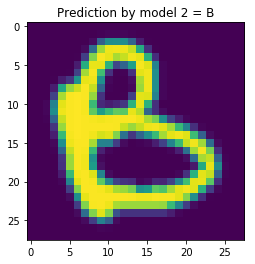

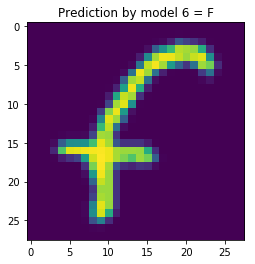

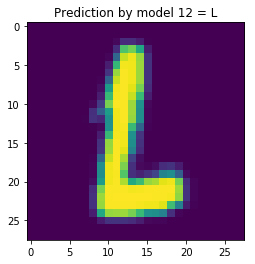

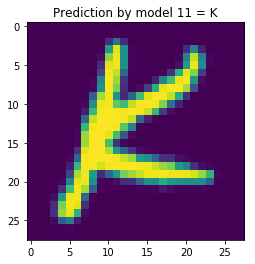

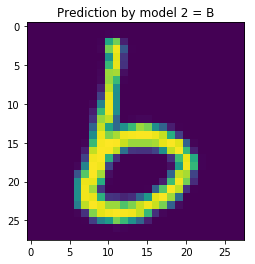

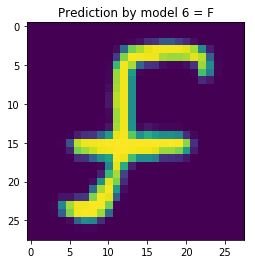

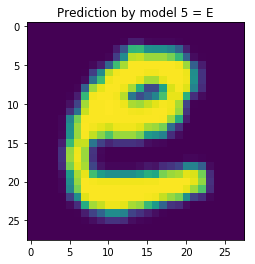

In [ ]:
from tkinter import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import struct
import time
import skimage.transform as trans
import skimage.color as colr





def get_data():
    data_label = open('E:\\emnist-letters-train-labels-idx1-ubyte','rb')
    data_image = open('E:\\emnist-letters-train-images-idx3-ubyte','rb')

    test_data_label = open('E:\\emnist-letters-test-labels-idx1-ubyte','rb')
    test_data_image = open('E:\\emnist-letters-test-images-idx3-ubyte','rb')

    #decoding the label from the label file     
    magic, num = struct.unpack(">II", data_label.read(8))
    lbl = np.fromfile(data_label, dtype=np.int8)

    #Decoding the test label form the label file
    magic, num = struct.unpack(">II", test_data_label.read(8))
    tlbl = np.fromfile(test_data_label, dtype=np.int8)

    # decoding the images form the coded i  mage file
    magic, num, rows, cols = struct.unpack(">IIII", data_image.read(16))
    img = np.fromfile(data_image, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    # decoding the images form the coded i  mage file
    magic, num, rows, cols = struct.unpack(">IIII", test_data_image.read(16))
    timg = np.fromfile(test_data_image, dtype=np.uint8).reshape(len(tlbl), rows, cols)
    
    return lbl,img,tlbl,timg




def show28():
    for i in range(6):
        im = np.random.randint(1,6000)
        plt.imshow(np.transpose(img[im]))
        plt.title('the image produce is for label '+str(lbl[im])+' = ' + mapping[lbl[im]])
        plt.pause(2)

def show20():
    for i in range(6):
        im = np.random.randint(1,6000)
        plt.imshow(np.transpose(X[im]))
        plt.title('the image produce is for label '+str(lbl[im])+' = ' + mapping[lbl[im]])
        plt.pause(2)

        

def parse_input(X):
   # X = colr.rgb2gray(X[1])
   # print(np.shape(X[1]))
   X_temp = np.zeros((np.shape(X)[0],20,20))
   for i in range(np.shape(X)[0]):
       X_temp[i] = trans.resize(X[i][:][:],[20,20])
   return X_temp

        
# random set up the weight for the network between the rang -1 to +1

def random_intialize(m,n):
    epl = .15
    wt = np.random.randn(m,n) *2 *ep1 -ep1
    return wt


def intializeInput(img1):
    index_1 = 1
    index_2 = 28
    X_val = np.zeros((np.shape(img1)[0],401))
  
    for i in range(np.shape(img1)[0]):
        index_1 = 1
        index_2 = 20
        for j in range(np.shape(img1)[1]):
                    X_val[i][index_1:(index_2+1)] = np.transpose(img1[i])[j][:]
                    index_1 =index_2+1
                    index_2 = 20 * (j+2)
    X_val[:,0] = 1 
    return X_val



def sigmoid(x):
    e = np.exp(-1*x)
    temp = np.ones(np.shape(e))
    e = temp + e
    e = np.divide(1,e)
    return e


def parse_label(lbl):
    parsed_label = np.zeros((np.shape(lbl)[0],26))
    for i in range(np.shape(lbl)[0]):
        parsed_label[i][lbl[i]-1] = 1
    return parsed_label   


def TrainModel():
    wt_1 =np.random.randn(401,40)
    wt_2 = np.random.randn(41,40)
    wt_3 = np.random.randn(41,26)
    for q in range(no_of_iteration):
        #feeding forward to network
        #between layer 1-)2
        z1 = X_val @ wt_1
        a = sigmoid(z1)
        #between layer 2 and 3
        a1 =np.ones((np.shape(X_val)[0],41))
        a1[:,1:] = a[:,:]
        z2 = a1 @ wt_2
        a = sigmoid(z2)
        # between layer 3-4
        a2 =np.ones((np.shape(X_val)[0],41))
        a2[:,1:] = a[:,:]
        z3 = a2 @ wt_3
        a3 = sigmoid(z3) 
        #output of neuron
        h = a3

        #   Calculating the cost
        temp = 0
        for i in range(np.shape(X_val)[0]):
            for k in range(np.shape(p_label)[1]):
                temp = temp + ((-1* p_label[i,k]) * (np.log(h[i,k])) - (1-p_label[i,k]) * (np.log(1-h[i,k])) )

        J =temp/m
        reg = (lambd/(2*m)) * (np.sum(np.power(wt_1[:,1:],2)) + np.sum(np.power(wt_2[:,1:],2))+np.sum(np.power(wt_3[:,1:],2)))
        J=J+reg
        print('The cost for itreation ',q,' is = ',J)

        #backprop

        sdelta_4 = h - p_label[:40000]
        sdelta_3 = (sdelta_4 @ np.transpose(wt_3)) * a2 *( np.ones(np.shape(a2)) -a2)
        sdelta_2 = (sdelta_3[:,1:] @ np.transpose(wt_2)) * a1 *( np.ones(np.shape(a1)) -a1)

        ldelta_3 = np.transpose(a2) @ sdelta_4 
        ldelta_2 = np.transpose(a1) @ sdelta_3[:,1:]
        ldelta_1 = np.transpose(X_val) @ sdelta_2[:,1:]

        #^ UPDATING NET-WEIGHT

        wt_1 = wt_1 - np.divide(ldelta_1,m) 
        wt_2 = wt_2 - np.divide(ldelta_2,m)
        wt_3 = wt_3 - np.divide(ldelta_3,m)
        # regularized
        wt_1[:,1:] = wt_1[:,1:] + ((lambd/m) *  wt_1[:,1:])
        wt_2[:,1:] = wt_2[:,1:] + ((lambd/m) *  wt_2[:,1:])
        wt_3[:,1:] = wt_3[:,1:] + ((lambd/m) *  wt_3[:,1:])


    

def TestModel():
    X_test = parse_input(timg)
    pt_label = parse_label(tlbl)
    twt_1 = np.load('wt_1.npy')
    twt_2 = np.load('wt_2.npy')
    twt_3 = np.load('wt_3.npy')

    
    
    
    X_val = intializeInput(X_test)
    z1 = X_val @ twt_1
    a = sigmoid(z1)
    #between layer 2 and 3
    a1 =np.ones((np.shape(X_val)[0],41))
    a1[:,1:] = a[:,:]
    z2 = a1 @ twt_2
    a = sigmoid(z2)
    # between layer 3-4
    a2 =np.ones((np.shape(X_val)[0],41))
    a2[:,1:] = a[:,:]
    z3 = a2 @ twt_3
    a3 = sigmoid(z3)
    print(np.sum(np.round(a3) == pt_label))
    accuracy  = (min(sum(np.round(a3)==pt_label))) / 20800
    print('accuray of the model is ',accuracy*100)
    for i in range(10):
        im = np.random.randint(0,10000)
        plt.imshow(np.transpose(timg[im]))
        plt.title('Prediction by model '+str(tlbl[im])+' = ' + mapping[tlbl[im]])
        plt.show()
    
        plt.pause(5)   
    
    



[lbl,img,tlbl,timg] = get_data()
#show(lbl,img)
X = parse_input(img)
#show(lbl,X)
np.random.seed(311)
p_label = parse_label(lbl)
X_val = intializeInput(X[:40000])


m,n = X_val.shape
no_of_iteration = 2000
lambd = 3

mapping = {1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',14:'N',15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',26:'Z',0:'?'}
master = Tk()
master.geometry("600x400")
w = Label(master,text = 'Handwritten Alphabet Recogination System',font='Times 19',height=5,borderwidth=2)
button1 = Button(master, text='Show Image 28 x 28', height = 2,width=25, command=show28,font='Times 10',borderwidth=2)
button2 = Button(master, text='Show Image 20 x 20', height = 2,width=25, command=show20,font='Times 10',borderwidth=2)
button3 = Button(master, text='Train Model',height = 2, width=25, command=TrainModel,font='Times 10',borderwidth=2)
button4 = Button(master, text='Run Model', height = 2,width=25, command=TestModel,font='Times 10',borderwidth=2)
button = Button(master, text='Exit', height = 2,  width=25, command=master.destroy,font='Times 10',borderwidth=2)
w.pack()
button1.pack()
button2.pack()
button3.pack()
button4.pack()
button.pack()

                


master.mainloop()
